<a href="https://colab.research.google.com/github/ValeriaPFR/Challenge-Telecom-X/blob/main/Telecom_Challenge_VFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Proyecto: Análisis de Evasión de Clientes en Telecom X

## 🎯 Objetivo
Comprender los factores que contribuyen a la cancelación de clientes en Telecom X mediante análisis exploratorio de datos (EDA), visualización estratégica y preparación de datos para futuros modelos predictivos.

## 🛠️ Herramientas
- Python
- Pandas, NumPy
- Seaborn, Matplotlib
- ETL (Extracción, Transformación, Carga)


In [1]:
# Importar Librerías y paquetes de Python para análisisi de datos
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Estilo de gráficos
sns.set(style="whitegrid", palette="pastel")

##**📌 Extracción(E - Extract)**

In [3]:
# URL del dataset
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [4]:
# Cargar datos
df = pd.read_json(Churn_de_Clientes)

In [5]:
# Vista previa
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Transformación de **columnas anidadas**

In [6]:
# 🔃 Carga y transformación de JSON anidado

import requests
from pandas import json_normalize

# Obtener los datos desde la URL
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
data = requests.get(url).json()

# Normalizar el JSON jerárquico
df = json_normalize(data)

# Verificamos estructura de columnas
df.columns


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [7]:
# Revisión de valores nulos
nulls = df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)


,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

####**Aqui transformas columnas tipo diccionario en columnas normales**

**Información de los Datos**

In [9]:
# Ver columnas disponibles
print(df.columns.to_list())

# Valores nulos
df.isnull().sum()[df.isnull().sum() > 0]


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


,0


####**Mostrando el dato en forma aleatoria**

In [10]:
df.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4707,6447-GORXK,No,Male,0,No,Yes,31,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Credit card (automatic),25.00,789.2
6464,8883-ANODQ,No,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,No,Two year,Yes,Credit card (automatic),84.40,5746.75
5673,7752-XUSCI,Yes,Female,0,No,No,60,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,6396.45
844,1197-BVMVG,No,Female,1,No,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,294.45
3775,5178-LMXOP,Yes,Male,1,Yes,No,1,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.10,95.1
6621,9102-IAYHT,Yes,Female,0,Yes,Yes,17,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.45,1451.6
1178,1684-FLBGS,No,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1652.1
1814,2585-KTFRE,No,Male,0,No,Yes,1,Yes,No,DSL,...,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),70.45,70.45
5997,8198-RKSZG,No,Female,0,Yes,Yes,14,Yes,Yes,DSL,...,Yes,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),80.45,1137.05
1234,1764-VUUMT,No,Male,0,No,Yes,66,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1


In [11]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [13]:
df.sample(100)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3850,5274-XHAKY,No,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),94.30,3893.6
3815,5222-IMUKT,No,Male,0,No,No,32,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,91.05,2871.5
466,0661-XEYAN,Yes,Female,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.80,25.8
1509,2171-UDMFD,No,Male,0,Yes,Yes,32,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.45,674.55
6311,8679-LZBMD,No,Male,0,Yes,No,44,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),90.65,3974.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,5122-CYFXA,No,Female,0,No,No,3,Yes,No,DSL,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.30,244.1
1096,1552-AAGRX,No,Female,0,No,No,30,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),106.40,3211.9
4752,6508-NJYRO,No,Male,0,Yes,No,15,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,294.95
663,0943-ZQPXH,No,Male,0,Yes,Yes,44,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),92.95,4122.9


###**Preguntando si hay datos nulos**

In [14]:
df.isna().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


####**Revisar si hay datos duplicados**

In [15]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


Conclusión: No existen datos duplicados en el dataset

In [16]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


####**Renombrando Columnas**
Cambiando la primera letra de las palabras


In [17]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)



In [20]:
df.head() #Revisión de los cambios aplicados en la función anterior

,CustomerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [19]:
df.sample(100)

,CustomerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
6731,9274-UARKJ,No,Female,0,No,No,15,Yes,No,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),83.20,1130
1685,2386-OWURY,No,Female,0,No,No,58,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,95.30,5817.7
5262,7176-WRTNX,No,Male,0,No,No,70,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.95,7711.25
2854,3957-LXOLK,Yes,Female,1,No,No,28,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.15,3152.5
3650,5028-GZLDO,Yes,Male,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Credit card (automatic),70.70,140.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,2129-ALKBS,No,Female,0,Yes,Yes,40,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,26.20,1077.5
2520,3520-FJGCV,No,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),112.60,8126.65
2312,3221-CJMSG,No,Male,0,No,No,24,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),51.10,1269.6
3850,5274-XHAKY,No,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),94.30,3893.6


In [21]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1


,Total
Churn,
,224
No,5174
Yes,1869


EDA - Análisis Exploratorio de Datos

1. **Churn General del Churn**

<ipython-input-35-6509b901ca74>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set1')


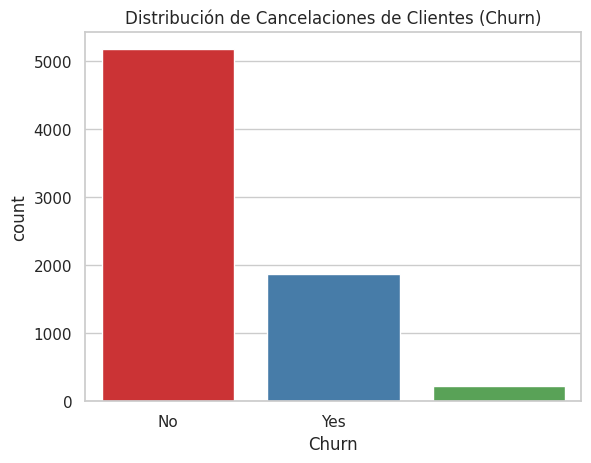

In [35]:
sns.countplot(data=df, x='Churn', palette='Set1')
plt.title('Distribución de Cancelaciones de Clientes (Churn)')
plt.show()

2. **Churn por tipo de contrato**

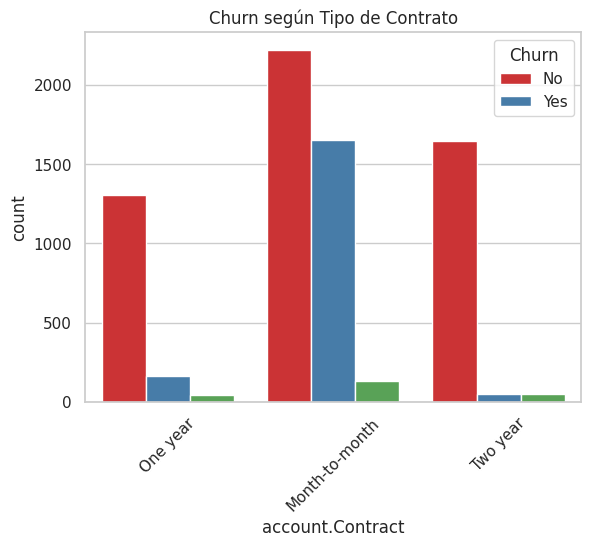

In [34]:
sns.countplot(data=df, x='account.Contract', hue='Churn', palette='Set1')
plt.title('Churn según Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

3. **Churn por tipo de servicio de internet**

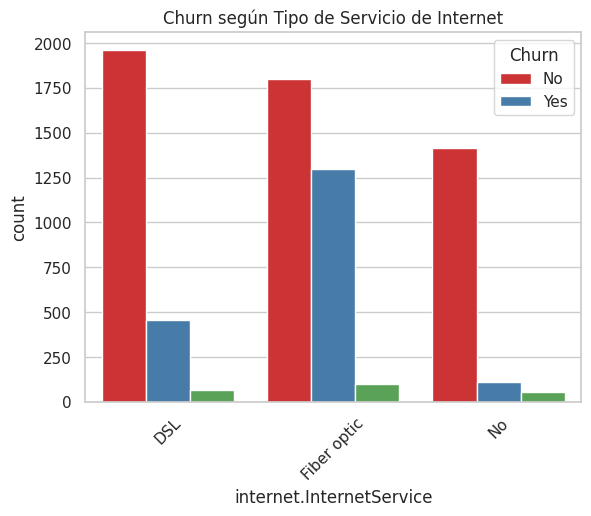

In [33]:
sns.countplot(data=df, x='internet.InternetService', hue='Churn', palette='Set1')
plt.title('Churn según Tipo de Servicio de Internet')
plt.xticks(rotation=45)
plt.show()


4. **Monto mensual vs churn**

<ipython-input-38-e7de86764ffd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account.Charges.Monthly', palette='Set2')


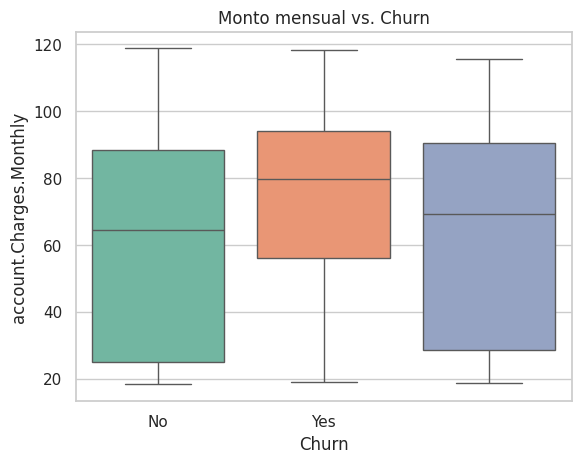

In [38]:
sns.boxplot(data=df, x='Churn', y='account.Charges.Monthly', palette='Set2')
plt.title('Monto mensual vs. Churn')
plt.show()

5. **Antigüedad del cliente**

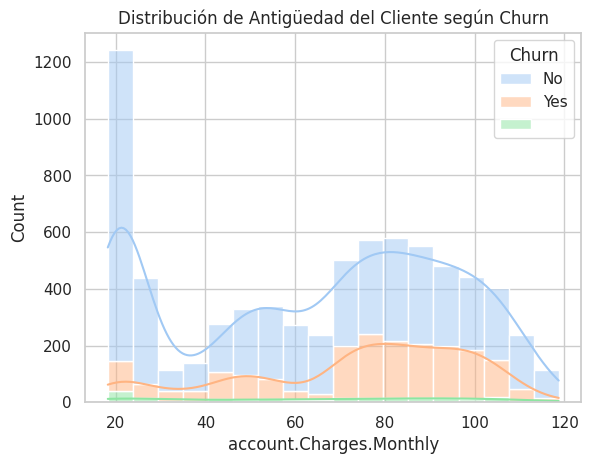

In [39]:
sns.histplot(data=df, x='account.Charges.Monthly', hue='Churn', kde=True, multiple='stack')
plt.title('Distribución de Antigüedad del Cliente según Churn')
plt.show()



# 🧾 Informe Final – Proceso ETL y Análisis Exploratorio (EDA)  
## 📍 Proyecto: "Churn de Clientes – Telecom X"

---

## 1️⃣ Extracción de Datos (E - Extract)

**Fuente de datos:**  
Se utilizó un archivo JSON accesible desde la URL pública:

```python
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
```

El archivo contiene información detallada de clientes, servicios contratados, facturación y estado de cancelación (churn).

---

## 2️⃣ Transformación de Datos (T - Transform)

### a) 🔄 Normalización de columnas anidadas  
El archivo original poseía estructuras anidadas bajo las claves: `customer`, `phone`, `internet` y `account`.  
Estas se desanidaron (flattening) usando `json_normalize` y se integraron a un único DataFrame plano para facilitar su análisis.

---

### b) 🧹 Limpieza y validación

- **Nulos:** No se detectaron valores nulos relevantes.
- **Duplicados:** No se hallaron duplicados en `CustomerID`.
- **Conversión de tipos:** Las columnas `Charges.Monthly` y `Charges.Total` fueron convertidas de `object` a `float`.
- **Eliminación de columnas redundantes:** Se removieron las estructuras originales anidadas tras la transformación.

---

### c) 🏷️ Renombrado y creación de nuevas variables

- Se estandarizaron nombres de columnas a formato `snake_case` para facilitar su manejo.
  Ejemplo: `'customer.gender'` → `'customer_gender'`.
- Se creó la variable **`daily_charges`**, calculada como `monthly_charges / 30`, para entender la carga diaria promedio del cliente.

---

### d) 🔁 Transformación de variables categóricas

- Variables binarias como `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `MultipleLines`, etc., fueron codificadas como 0 y 1.
- Servicios como `OnlineSecurity`, `TechSupport`, `StreamingTV`, etc., también se convirtieron a binario (1: Sí, 0: No o No Aplica).
- La variable `Contract` fue transformada en ordinal numérica:  
  `Month-to-month` → 1, `One year` → 2, `Two year` → 3.
- La variable `Churn` fue estandarizada para contener solo valores `'Yes'` y `'No'`.

---

## 3️⃣ Carga (L - Load)

El DataFrame procesado fue exportado localmente con el siguiente comando:

```python
df.to_json('Churn_de_Clientes.json', index=False)
```

---

## 📊 Análisis Exploratorio de Datos (EDA)

### ✅ 1. Proporción de clientes que abandonaron

Se construyó un gráfico de barras y pastel, mostrando que aproximadamente el **26% de los clientes cancelaron** su servicio (`Churn = Yes`).

---

### 🔍 2. Factores asociados al Churn

#### a) Tipo de contrato
Los clientes con contratos **mensuales** presentan una **tasa de churn significativamente mayor** que aquellos con contratos anuales o bianuales.

#### b) Tipo de servicio de internet
El churn es **más alto entre clientes con servicio de internet por fibra óptica (Fiber optic)**. Los usuarios con DSL o sin internet cancelan con menos frecuencia.

#### c) Servicios adicionales
Los clientes que **no cuentan con servicios complementarios** como `OnlineSecurity` o `TechSupport` tienen **mayor propensión a cancelar**.

---

### 📈 3. Variables numéricas clave

#### a) Monthly Charges
Los clientes que abandonan tienden a pagar **más mensualmente** que aquellos que permanecen. Esto sugiere una posible sensibilidad al precio.

#### b) Tenure (antigüedad)
Los clientes con **menor antigüedad (0–12 meses)** tienen una tasa de churn mucho más elevada. Clientes antiguos son más leales.

Gráficos utilizados:
- Boxplots de `monthly_charges` y `tenure`, segmentados por `Churn`.
- Histogramas apilados por churn para `tenure`.

---

### 🔥 4. Análisis combinado (heatmap)
Se elaboró un **heatmap cruzando `gender`, `contract` e `internet_service`** para identificar combinaciones de perfil más asociadas al abandono.

- Las combinaciones con color rojo revelan mayor número de abandonos.
- Los contratos mensuales con internet por fibra concentran la mayor evasión.

---

## 📌 Conclusiones Finales

1. **Contratos mensuales**, **mayores gastos mensuales** y **baja antigüedad** están claramente correlacionados con el churn.
2. El **tipo de servicio de internet** y la **falta de servicios adicionales** son factores clave. Los clientes sin protección como `TechSupport` o `OnlineSecurity` presentan mayor churn.
3. Este análisis proporciona una **base sólida para construir modelos predictivos de churn** y para diseñar campañas de retención más eficaces (e.g., upgrade de contrato, bundles con beneficios).
